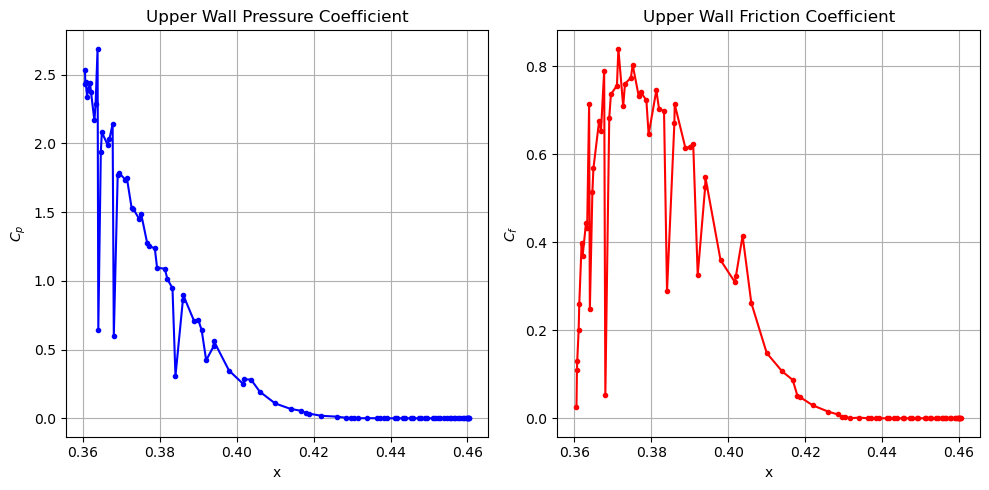

In [24]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

with h5py.File("./res/wall_cp_cf_step600.h5", "r") as f:
    x_all = f["x"][:]
    y_all = f["y"][:]
    cp_all = f["Cp"][:]
    cf_all = f["Cf"][:]

# 合并数据为结构数组
data = np.stack((x_all, y_all, cp_all, cf_all), axis=-1)

# 按 x 排序
sorted_indices = np.argsort(data[:, 0])
data = data[sorted_indices]

# 对每个 x 保留 y 最大的点（上壁面）
x_unique = {}
for x, y, cp, cf in data:
    if x not in x_unique or y > x_unique[x][0]:
        x_unique[x] = (y, cp, cf)

# 构造输出数组
x_sorted = np.array(sorted(x_unique.keys()))
cp_sorted = np.array([x_unique[x][1] for x in x_sorted])
cf_sorted = np.array([x_unique[x][2] for x in x_sorted])

# 绘图
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_sorted, cp_sorted, 'b.-')
plt.xlabel("x")
plt.ylabel("$C_p$")
plt.title("Upper Wall Pressure Coefficient")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(x_sorted, cf_sorted, 'r.-')
plt.xlabel("x")
plt.ylabel("$C_f$")
plt.title("Upper Wall Friction Coefficient")
plt.grid(True)

plt.tight_layout()
plt.show()


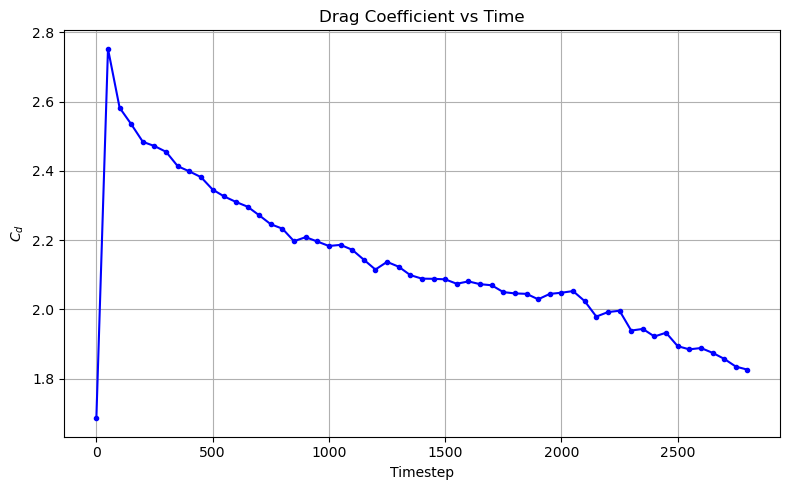

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# 读取文件
data = np.loadtxt("Cd_vs_time.txt")
steps = data[:, 0]
Cd = data[:, 1]

# 绘图
plt.figure(figsize=(8, 5))
plt.plot(steps, Cd, 'b.-')
plt.xlabel("Timestep")
plt.ylabel("$C_d$")
plt.title("Drag Coefficient vs Time")
plt.grid(True)
plt.tight_layout()
plt.savefig("Cd_vs_time.png", dpi=300)
plt.show()
